In [5]:
from train import *
from matplotlib import pyplot as plt
from IPython import display
import time

In [6]:
dataset = dataloader("train.txt", 10, 64, 64)
images,_=dataset.get_next_batch()

In [3]:
intensor = images
d=three_conv_network(20,64,64)
out=d.forward(intensor)
out_diff = np.ones([10,20])
d.backward(out_diff,1)

In [4]:
d.bias

AttributeError: 'three_conv_network' object has no attribute 'bias'

In [3]:
class model:
    def __init__(self, in_channels, out_channels):
        self.fl = conv_sigmoid(in_channels, out_channels, 64, 64)
        self.out_channels = out_channels
    def forward(self, in_tensor):
        return self.fl.forward(in_tensor)
    def backward(self, out_diff_tensor, lr):
        self.fl.backward(out_diff_tensor, lr)
    def inference(self, in_tensor):
        out_tensor = self.forward(in_tensor).reshape(in_tensor.shape[0], self.out_channels)
        return np.argmax(out_tensor, axis=1)

KeyboardInterrupt: 

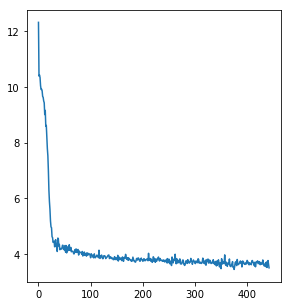

In [8]:
model2 = three_conv_network(20, 64, 64)
trainer2 = trainer(model2, dataset, 0.001)
loss = []
accurate = []
temp = 0
#trainer2.iterate()
for i in range(50000):
    display.clear_output(wait = True)
    temp += trainer2.iterate()
    if i % 10 == 0 and i != 0:
        loss.append(temp / 10)
        temp = 0
        if i % 100 == 0:
            accurate.append(test(trainer2.net, "test.txt", 64, 64))
    plt.figure(figsize=(10,5))       
    plt.subplot(1,2,1)
    plt.plot(loss)
    plt.subplot(1,2,2)
    plt.plot(accurate)
    plt.show()

In [274]:
test(trainer2.net, "test.txt", 64, 64)

0.308

In [10]:
a = np.random.randn(1000,1)
print(np.dot(a.T,a)/1000)

[[ 0.98800262]]


In [23]:
a = np.array([[1,2,3],[3,0,5],[1,2,4],[3,5,1]])
c = np.zeros(a.shape)
b = a.argmax(axis=1)
a[range(4),b] = 0
a

array([[1, 2, 0],
       [3, 0, 0],
       [1, 2, 0],
       [3, 0, 1]])

In [12]:
net = conv_layer(3, 20, 64, 64, same=False)
out = net.forward(images)
out.shape

(100, 20, 1, 1)